In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

DIR = 'E:/Documents/Papers/Azamat_variables/'
os.chdir(DIR)

In [6]:
ASASSN_var = pd.read_csv('ASASSN_to_4XMM.csv')

In [26]:
ASASSN_var.columns

Index(['Unnamed: 0', 'ID', 'RAJ2000', 'DEJ2000', 'l', 'b', 'ML_classification',
       'ML_probability', 'Mean_gmag', 'Amplitude', 'Period', 'EpochHJD',
       'LKSL_statistic', 'ASASSN_Discovery', 'EDR3_source_id', 'parallax',
       'parallax_error', 'parallax_over_error', 'pm', 'pmra', 'pmra_error',
       'pmdec', 'pmdec_error', 'ruwe', 'phot_g_mean_mag', 'e_phot_g_mean_mag',
       'phot_bp_mean_mag', 'e_phot_bp_mean_mag', 'phot_rp_mean_mag',
       'e_phot_rp_mean_mag', 'bp_rp', 'EDR3_dist', 'GALEX_ID', 'FUVmag',
       'e_FUVmag', 'NUVmag', 'e_NUVmag', 'TIC_ID', 'AllWISE_ID', 'W1mag',
       'W2mag', 'W3mag', 'W4mag', 'Jmag', 'Hmag', 'Kmag', 'e_W1mag', 'e_W2mag',
       'e_W3mag', 'e_W4mag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Reference',
       'Flux8', 'V'],
      dtype='object')

In [73]:
import math
import numpy as np
ASASSN_var['MG']=ASASSN_var['phot_g_mean_mag'].values+5-5*np.log10(ASASSN_var['EDR3_dist'].values)


In [62]:
[f'{i} {percentages[i]}' for i in percentages[percentages < 1].index]

NameError: name 'percentages' is not defined

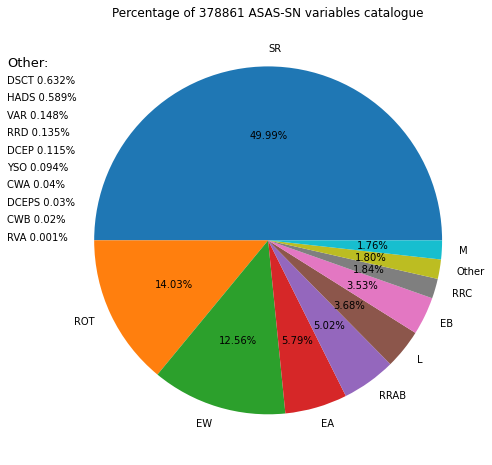

In [4]:
# Get the unique categories
categories = ASASSN_var['ML_classification'].unique()

# Calculate the percentage of each category
percentages = ASASSN_var['ML_classification'].value_counts() / ASASSN_var['ML_classification'].value_counts().sum() * 100
other = pd.Series({'Other':percentages[percentages < 1].sum()})
percentages = percentages.append(other)
percentages = percentages.sort_values(ascending=False)

#sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
plt.pie(percentages[percentages > 1], labels=percentages[percentages > 1].index, autopct='%2.2f%%')
plt.title(f"Percentage of {len(ASASSN_var.ID)} ASAS-SN variables catalogue") 

x=0.9
plt.text(-1.5,1,'Other:', fontsize = 13)
for i in percentages[percentages < 1].index:
    plt.text(-1.5,x,f'{i} {percentages[i].round(3)}%')
    x -= 0.1


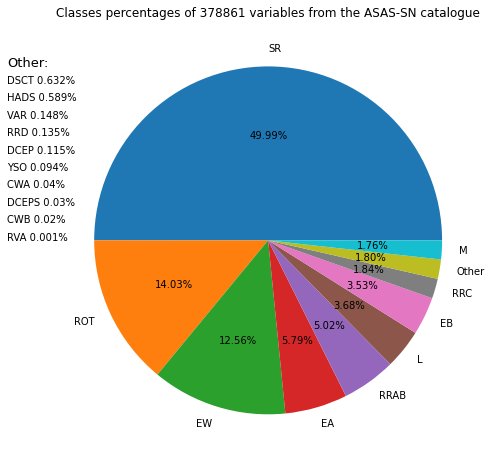

In [6]:
import matplotlib.pyplot as plt
from matplotlib.text import Text

# Create a figure and axis
fig, ax = plt.subplots(figsize = (8,8))

# Define the title with an active link
title_text = 'the ASAS-SN catalogue'
title = ax.set_title(f'Classes percentages of {len(ASASSN_var.ID)} variables from {title_text}')

# Make the title clickable
title.set_url('https://ui.adsabs.harvard.edu/abs/2023MNRAS.519.5271C/abstract')
#title.set_color('blue')  # Set the color of the link (optional)

# Remove the underline style if desired (optional)
#for text_obj in ax.texts:
#    if isinstance(text_obj, Text) and text_obj.get_text() == title_text:
#        text_obj.set_path_effects([])

ax.pie(percentages[percentages > 1], labels=percentages[percentages > 1].index, autopct='%2.2f%%')        
x=0.9
ax.text(-1.5,1,'Other:', fontsize = 13)
for i in percentages[percentages < 1].index:
    ax.text(-1.5,x,f'{i} {percentages[i].round(3)}%')
    x -= 0.1
# Display the plot
#plt.savefig('link.pdf')

(0.0, 10000.0)

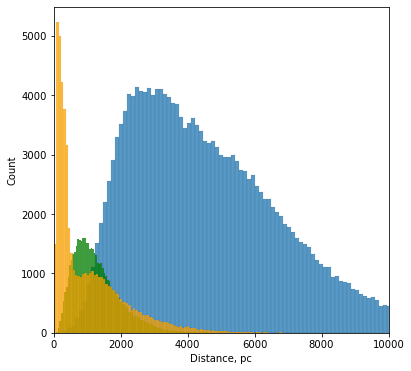

In [110]:
plt.figure(figsize=(6,6))
sns.histplot(data = ASASSN_var[ASASSN_var.ML_classification=='SR'], x='EDR3_dist')
#sns.histplot(data = ASASSN_var[ASASSN_var.ML_classification=='EW'], x='EDR3_dist', y='phot_g_mean_mag')
sns.histplot(data = ASASSN_var[ASASSN_var.ML_classification=='EW'], x='EDR3_dist', color='green')
sns.histplot(data = ASASSN_var[ASASSN_var.ML_classification=='ROT'], x='EDR3_dist', color='orange',)
plt.xlabel('Distance, pc')
plt.xlim(0,10000)

In [225]:
import astropy.coordinates as coord
import astropy.units as u

In [121]:
RA_rot = ASASSN_var[ASASSN_var.ML_classification=='ROT']['RAJ2000'] #[ASASSN_var.ML_classification=='ROT']
DEC_rot = ASASSN_var[ASASSN_var.ML_classification=='ROT']['DEJ2000']
dist_rot = ASASSN_var[ASASSN_var.ML_classification=='ROT']['EDR3_dist']/1000
MG_rot = ASASSN_var[ASASSN_var.ML_classification=='ROT']['MG']
bp_rp_rot = ASASSN_var[ASASSN_var.ML_classification=='ROT']['bp_rp']
RA_ew = ASASSN_var[ASASSN_var.ML_classification=='EW']['RAJ2000'] #[ASASSN_var.ML_classification=='ROT']
DEC_ew = ASASSN_var[ASASSN_var.ML_classification=='EW']['DEJ2000']
dist_ew = ASASSN_var[ASASSN_var.ML_classification=='EW']['EDR3_dist']/1000
MG_ew = ASASSN_var[ASASSN_var.ML_classification=='EW']['MG']
bp_rp_ew = ASASSN_var[ASASSN_var.ML_classification=='EW']['bp_rp']

(12.0, 0.0)

<Figure size 432x432 with 0 Axes>

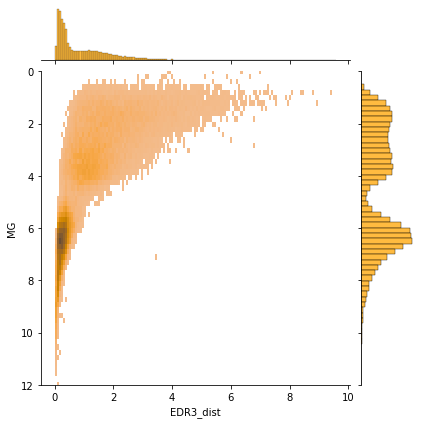

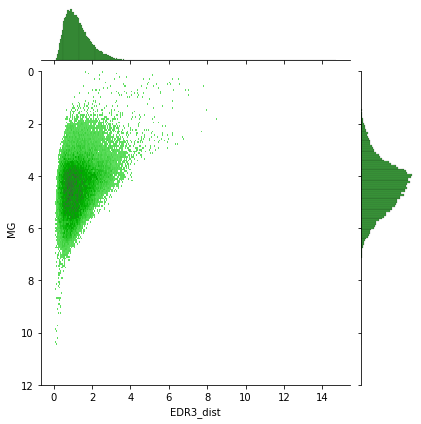

In [134]:
fig = plt.figure(figsize=(6,6))
sns.jointplot(y=MG_rot, x=dist_rot, color='orange', kind='hist')
plt.ylim(12,0)
sns.jointplot(y=MG_ew, x=dist_ew, color='green', kind='hist')
plt.ylim(12,0)

(0.0, 8.0)

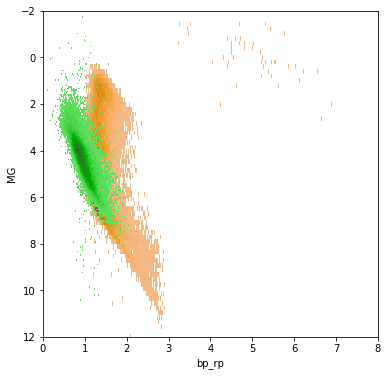

In [123]:
fig = plt.figure(figsize=(6,6))
sns.histplot(x=bp_rp_rot,y=MG_rot, color='orange')
sns.histplot(x=bp_rp_ew,y=MG_ew, color='green')
plt.ylim(12,-2)
plt.xlim(0,8)

In [420]:
print(RA.value_counts().sum(),DEC.value_counts().sum(),dist.value_counts().sum())

53169 53169 53169


[(0.0, 360.0), (-90.0, 90.0)]

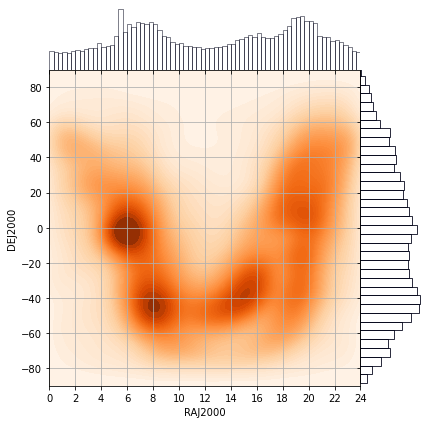

In [129]:
g = sns.JointGrid(x=RA_rot, y=DEC_rot, space=0) #, xlim=(-5,6), ylim=(14,-2)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=50, cmap="Oranges",  clip=((0, 360), (-90, 90))) #,  clip=((-.1, 4.1), (14, -2))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, binwidth=5, fill=False)
new_xtick_labels = [str(i) for i in range(0, 25, 2)]  # Replace with your desired labels
g.ax_joint.set_xticks([i for i in range(0, 390, 30)])  # Set the positions of the ticks
g.ax_joint.set_xticklabels(new_xtick_labels)
g.ax_joint.grid(True)
g.ax_joint.set(xlim=(0,360), ylim=(-90,90)) 


[(0.0, 360.0), (-90.0, 90.0)]

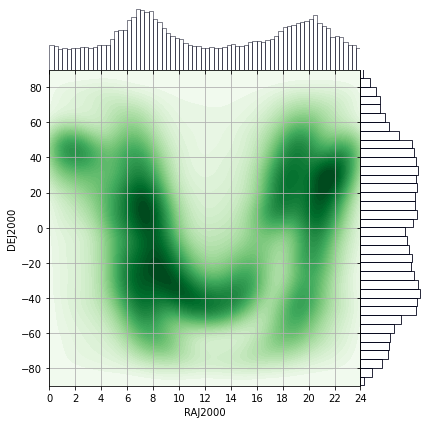

In [127]:
g = sns.JointGrid(x=RA_ew, y=DEC_ew, space=0) #, xlim=(-5,6), ylim=(14,-2)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=50, cmap="Greens",  clip=((0, 360), (-90, 90))) #,  clip=((-.1, 4.1), (14, -2))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, binwidth=5, fill=False)
new_xtick_labels = [str(i) for i in range(0, 25, 2)]  # Replace with your desired labels
g.ax_joint.set_xticks([i for i in range(0, 390, 30)])  # Set the positions of the ticks
g.ax_joint.set_xticklabels(new_xtick_labels)
g.ax_joint.grid(True)
g.ax_joint.set(xlim=(0,360), ylim=(-90,90)) 

<AxesSubplot:xlabel='RAJ2000', ylabel='DEJ2000'>

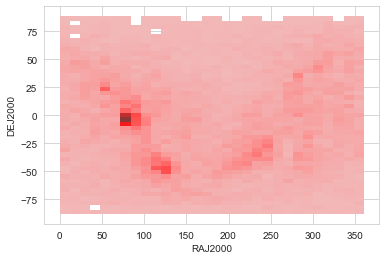

In [430]:
sns.histplot(x=RA[dist <= 0.6],y=DEC[dist <= 0.6],color='red')

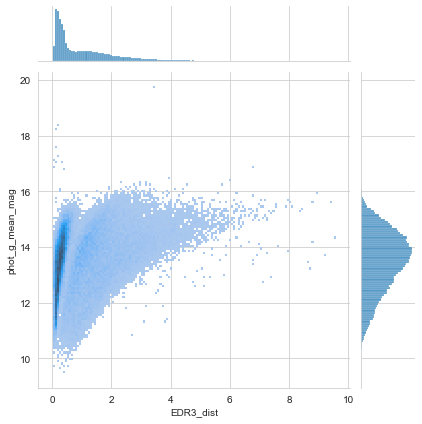

In [469]:
sns.jointplot(y= ASASSN_var[ASASSN_var.ML_classification=='ROT']['phot_g_mean_mag'],x=ASASSN_var[ASASSN_var.ML_classification=='ROT']['EDR3_dist']/1000, kind ='hist')
#plt.xlim(9.5,18)#sns.histplot(ASASSN_var[ASASSN_var.ML_classification=='SR']['phot_g_mean_mag'])

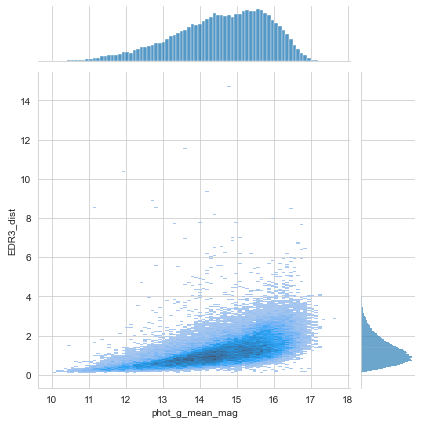

In [455]:
sns.jointplot(x= ASASSN_var[ASASSN_var.ML_classification=='EW']['phot_g_mean_mag'],y=ASASSN_var[ASASSN_var.ML_classification=='EW']['EDR3_dist']/1000, kind ='hist')

(0.0, 1.0)

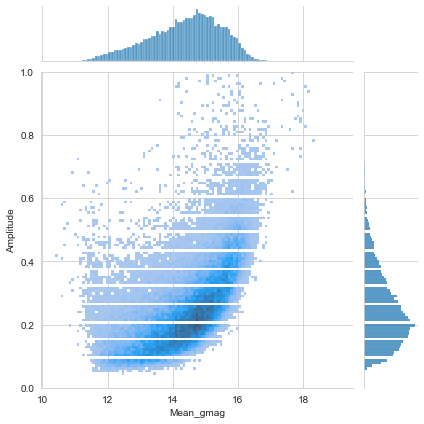

In [458]:
sns.jointplot(y = ASASSN_var[ASASSN_var.ML_classification=='ROT']['Amplitude'],x=ASASSN_var[ASASSN_var.ML_classification=='ROT']['Mean_gmag'],kind='hist')
plt.ylim(0,1)

<AxesSubplot:xlabel='EDR3_dist', ylabel='Count'>

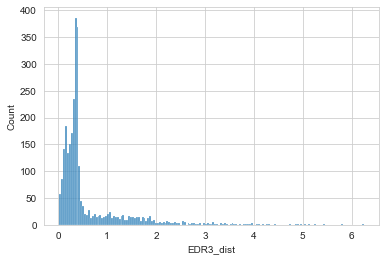

In [468]:
dist_filtered = dist.loc[(DEC >= -25) & (DEC <= 25)]
dist_filtered2 = dist_filtered.loc[(RA >= 60) & (RA <= 90)]
sns.histplot(dist_filtered2)

In [373]:
c = coord.SkyCoord(ra=RA*u.degree, dec=DEC*u.degree, distance=dist.to_numpy()*u.kpc, frame='icrs')

In [381]:
gal_cen = c.transform_to(coord.Galactocentric)

In [339]:
gal_cen[0]

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in kpc
    (-8.23792008, 0.54061531, -1.58783061)>

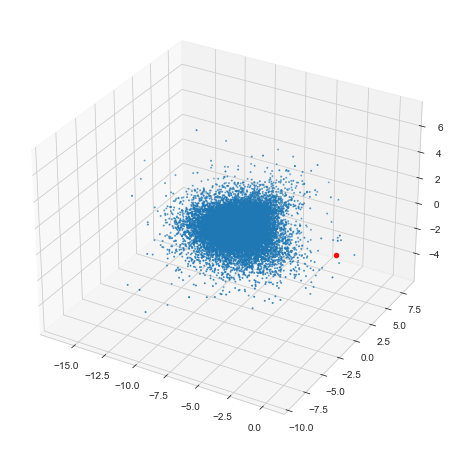

In [382]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
ax.scatter(gal_cen.x.value, gal_cen.y.value, gal_cen.z.value,s=1,depthshade=True)
ax.scatter(0, 0, 0,s=20,depthshade=True, color='red')

In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.pylab as plt
import astropy.coordinates as coord
import astropy.units as u
import numpy as np
import pandas as pd

%matplotlib inline

fig=plt.figure(figsize=(18,12))
gs1=gridspec.GridSpec(2,1,height_ratios=[3,1])
ax1=fig.add_subplot(gs1[0],projection="aitoff")
ax2=fig.add_subplot(gs1[1])
ax2.axis("off")
plt.subplots_adjust(left=0.12,right=0.95,wspace=0.,bottom=0.07,top=0.95,hspace=0.)



## the Galactic plane
num_coords=800
Galactic_plane=pd.DataFrame(data={'GAL_LON': np.linspace(-1.*np.pi,1.*np.pi,num_coords),'GAL_LAT': np.repeat(0.,num_coords),'GAL_LOW': np.repeat(-10.*np.pi/180.,num_coords),'GAL_UPP': np.repeat(10.*np.pi/180.,num_coords)})

ICRS_coord_LOWER=coord.SkyCoord(np.linspace(-1.*np.pi,1.*np.pi,num_coords),np.repeat(-10.*np.pi/180.,num_coords),frame='galactic',unit='rad').icrs
RA_LOWER=coord.Angle(ICRS_coord_LOWER.ra.value*np.pi/180.*u.rad).wrap_at(np.pi*u.rad).value#-2.*np.pi
DEC_LOWER=ICRS_coord_LOWER.dec.value*np.pi/180.

ICRS_coord_MIDDLE=coord.SkyCoord(np.linspace(-1.*np.pi,1.*np.pi,num_coords),np.repeat(0.*np.pi/180.,num_coords),frame='galactic',unit='rad').icrs
RA_MIDDLE=coord.Angle(ICRS_coord_MIDDLE.ra.value*np.pi/180.*u.rad).wrap_at(np.pi*u.rad).value#-2.*np.pi
DEC_MIDDLE=ICRS_coord_MIDDLE.dec.value*np.pi/180.

ICRS_coord_UPPER=coord.SkyCoord(np.linspace(-1.*np.pi,1.*np.pi,num_coords),np.repeat(+10.*np.pi/180.,num_coords),frame='galactic',unit='rad').icrs
RA_UPPER=coord.Angle(ICRS_coord_UPPER.ra.value*np.pi/180.*u.rad).wrap_at(np.pi*u.rad).value#-2.*np.pi
DEC_UPPER=ICRS_coord_UPPER.dec.value*np.pi/180.

RA_MW=np.append(RA_LOWER,RA_UPPER)
DEC_MW=np.append(DEC_LOWER,DEC_UPPER)
G_PLANE=pd.DataFrame(data={"RA":RA_MW,"DEC":DEC_MW})
G_PLANE=G_PLANE.sort_values(by=['RA'])
ax1.plot(-G_PLANE.RA,G_PLANE.DEC,color="C4",alpha=0.5,zorder=-1)


## plot the key
ax2.fill_between([-1.,-1.],-1.,-1.,alpha=0.5,facecolor="C4",edgecolor="none",label=r"${\rm Milky\ Way}$")
ax2.set_xlim(-5.,-4.)
leg=ax2.legend(loc="lower center",ncol=3,markerscale=2.)


## aesthetics
ax1.set_xlabel(r"${\rm R.\,A.}$")
ax1.set_ylabel(r"${\rm Dec.}$",rotation=270.,labelpad=50.)
ax1.yaxis.tick_right()
ax1.tick_params(axis='y',which='both',length=0)
ax1.yaxis.set_label_position("right")
ax1.annotate(r"${\rm N}$",xy=(0.,1.2),xycoords=ax1.get_xaxis_transform(),fontsize=50.,ha='center',va='center')
ax1.annotate(r"${\rm E}$",xy=(-3.4,0.5),xycoords=ax1.get_xaxis_transform(),fontsize=50.,ha='center',va='center')   
plt.yticks(fontsize=36)
plt.xticks(fontsize=36)
ax1.set_xticklabels([r'$150^{\circ}$',r'$120^{\circ}$',r'$90^{\circ}$',r'$60^{\circ}$',r'$30^{\circ}$',r'$0^{\circ}$',r'$ $',r'$ $',r'$ $',r'$ $',r'$ $'])#,r'$$',r'$$',r'$$',r'$$',r'$$'
ax1.set_yticklabels([r'$$',r'$$',r'$$',r'$$',r'$$',r'$0^{\circ}$',r'$15^{\circ}$',r'$30^{\circ}$',r'$45^{\circ}$',r'$60^{\circ}$',r'$75^{\circ}$'])
ax1.grid(True,color="0.2")
ax1.plot(c.ra,c.dec, 'r.')

In [136]:
ASASSN_var.to_csv('new_file.csv')